# 1. Objetivo

## Problemática

La mancha foliar por Septoria del tomate es una de las enfermedades foliares más destructivas de este cultivo a nivel mundial. Se ha documentado en prácticamente todas las regiones donde se produce tomate, desde América hasta el Mediterráneo y Asia, causando pérdidas significativas de rendimiento y calidad. Estudios reportan reducciones de cosecha que típicamente alcanzan el 30–50% cuando la infección provoca defoliación extensa bajo condiciones ambientales favorables (Pandey et al., 2024; Panno et al., 2021). En casos extremos, con campos fuertemente defoliados, las pérdidas productivas pueden llegar incluso al 100% de la cosecha (Aabida et al., 2021). Estas mermas se traducen en un impacto económico considerable para los agricultores, dado que el tomate es uno de los principales cultivos hortícolas globales en volumen y valor comercial. Por ejemplo, en EE. UU. el mercado anual de tomate supera los 11 mil millones de dólares, lo que ilustra la magnitud del riesgo económico que implica una epidemia severa de Septoria (Pandey et al., 2024).


Los agricultores y agrónomos enfrentan grandes retos para detectar y controlar a tiempo la septoriosis foliar. Los síntomas iniciales – pequeñas manchas circulares de centro grisáceo y borde oscuro en las hojas inferiores – suelen aparecer mediada la temporada (al iniciarse la fructificación) y pueden confundirse con otras enfermedades foliares como el tizón temprano por Alternaria, dificultando el diagnóstico oportuno sin ayuda experta (Pandey et al., 2024; Panno et al., 2021). Además, el hongo se disemina rápidamente mediante salpicaduras de lluvia o riego y puede sobrevivir de un ciclo a otro en restos de plantas o semillas infectadas, lo que complica su erradicación (Panno et al., 2021). En cuanto al control, la estrategia más común es la aplicación regular de fungicidas, pero esto presenta limitantes: en sistemas orgánicos su uso es restringido o nulo, y en producción convencional el uso repetido puede conducir a poblaciones del patógeno resistentes a los químicos disponibles (Pandey et al., 2024). Asimismo, no existen variedades comerciales totalmente resistentes a Septoria, obligando a los productores a implementar tácticas integradas (rotación de cultivos, eliminación de restos infectados, mejora de ventilación en el follaje, etc.) para manejar la enfermedad (Pandey et al., 2024). Estos factores hacen evidente la necesidad de mejorar las herramientas de monitoreo y detección temprana, así como de desarrollar enfoques de manejo más efectivos y sostenibles.

La identificación temprana y automatizada de Septoria Leaf Spot mediante imágenes digitales e inteligencia artificial – por ejemplo, usando modelos de redes generativas antagónicas (GAN) – se perfila como una solución de alto impacto para la agricultura. Detectar la enfermedad en sus fases iniciales permitiría alertar al productor y tomar medidas antes de que ocurra una defoliación severa, cortando así el progreso del brote y reduciendo drásticamente las pérdidas de rendimiento. Las plataformas de visión artificial pueden monitorear extensas áreas de cultivo de forma continua y objetiva, superando las limitaciones del monitoreo manual en campo. De hecho, la literatura señala que las tecnologías automatizadas de detección de enfermedades son esenciales para prevenir la propagación frecuente de plagas y las pérdidas asociadas (Jafar et al., 2024). En particular, los modelos GAN ofrecen ventajas frente a otros enfoques de aprendizaje automático: su capacidad generativa les permite aprender patrones sutiles de las hojas sanas y enfermas, sintetizar imágenes adicionales de síntomas para ampliar los datos de entrenamiento, y así mejorar la robustez de la detección de anomalías en hojas que pudieran pasar inadvertidas para modelos convencionales. Una herramienta basada en GAN podría, por ejemplo, distinguir con alta sensibilidad las pequeñas lesiones iniciales de Septoria en imágenes, facilitando un diagnóstico precoz automatizado. Esto justificaría su uso por encima de clasificadores discriminativos tradicionales, ya que un GAN bien entrenado no solo clasifica, sino que genera conocimiento sobre cómo luce la enfermedad, volviéndose más eficaz incluso con conjuntos de datos limitados. En suma, la detección temprana automatizada mediante IA podría integrarse en programas de manejo integrado, permitiendo intervenciones más oportunas y precisas que protejan el rendimiento del tomate.


## Objetivo del Proyecto

Desarrollar un modelo basado en redes generativas adversarias (GAN) entrenado con imágenes de hojas de tomate sanas y afectadas por Septoria Leaf Spot, capaz de identificar automáticamente anomalías indicativas de esta enfermedad en etapas tempranas del cultivo. Este proyecto buscará mejorar la detección precoz de la septoriosis foliar para activar controles a tiempo y minimizar pérdidas, aprovechando la habilidad de los GAN para generar imágenes sintéticas de síntomas y aprender las características visuales complejas de la infección. La elección de un GAN sobre modelos convencionales se justifica por su doble función: incrementar la diversidad de datos de entrenamiento (superando la escasez de imágenes de enfermedades) y lograr una detección más robusta y sensible de la enfermedad, gracias a su enfoque generativo orientado a diferenciar hojas saludables de aquellas con señales sutiles de infección.

# 2. Carga de los datos 

Las imágenes empleadas en este trabajo fueron extraídas del PlantVillage Dataset.
Siendo consistente con las indicaciones del repositorio original, se cita el siguiente artículo:

Mohanty, S. P., Hughes, D. P., & Salathé, M. (2016). Using deep learning for image-based plant disease detection. Frontiers in Plant Science, 7, 1419. https://doi.org/10.3389/fpls.2016.01419

# 3. Preparación de los Datos

### Librerias necesarias

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from torch.optim import Adam
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, WeightedRandomSampler, random_split, Subset
import seaborn as sns
import torch
from collections import Counter
import random


### Redimencion y Normalizacion de imagenes


In [101]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),           # Redimensiona a 224x224
    transforms.ToTensor(),                   # Convierte a tensor y normaliza a [0, 1]
    transforms.Normalize([0.5]*3, [0.5]*3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),# Normaliza a [-1, 1] (opcional, recomendado para GANs)
])

dataset = ImageFolder(root="../data/", transform=transform)

healthy_idx = dataset.class_to_idx['healthy']
anomaly_idx = dataset.class_to_idx['anomaly']

print(dataset.class_to_idx)
print(f"Total imágenes: {len(dataset)}")

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


{'anomaly': 0, 'healthy': 1}
Total imágenes: 3362


### Visualizacion inicial de los datos


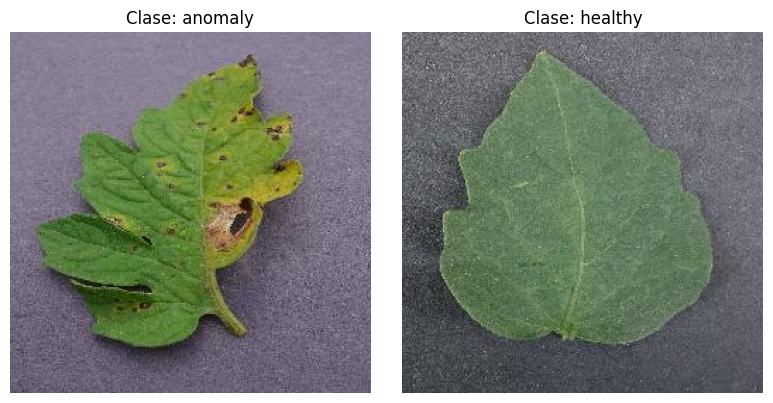

In [102]:

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for idx, class_name in enumerate(dataset.classes):
    for i, (path, label) in enumerate(dataset.samples):
        if label == idx:
            img_path = path
            break
    img = plt.imread(img_path)
    axs[idx].imshow(img)
    axs[idx].set_title(f"Clase: {class_name}")
    axs[idx].axis('off')

plt.tight_layout()
plt.show()

Clase: anomaly - Cantidad de imágenes: 1771
Clase: healthy - Cantidad de imágenes: 1591


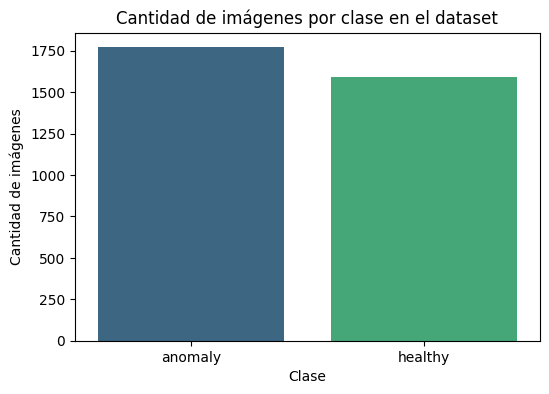

In [103]:
labels, counts = np.unique([label for _, label in dataset.samples], return_counts=True)
class_names = [dataset.classes[i] for i in labels]


for name, count in zip(class_names, counts):
    print(f"Clase: {name} - Cantidad de imágenes: {count}")

plt.figure(figsize=(6,4))
sns.barplot(x=class_names, y=counts, palette="viridis", hue=class_names)
plt.title("Cantidad de imágenes por clase en el dataset")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.show()

### Configuración general

In [104]:
device = 'cuda'
latent_dim = 128
img_size = 64
batch_size = 64
lr = 2e-4
epochs = 100

#### Division de data

In [105]:
# Esto obtiene los índices de cada imagen que pertenece a cada clase
healthy_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == healthy_idx]
anomaly_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == anomaly_idx]


In [106]:

train_indices = random.sample(healthy_indices, int(0.8 * len(healthy_indices)))
val_indices = list(set(healthy_indices) - set(train_indices))
test_indices = val_indices + anomaly_indices

# Seleccionar la misma cantidad de anomalías que de imágenes sanas para el test
anomaly_indices_sampled = random.sample(anomaly_indices, len(val_indices))
test_indices_balanced = val_indices + anomaly_indices_sampled

print(f"Total imágenes de entrenamiento: {len(train_indices)}")
print(f"Total imágenes de validación: {len(val_indices)}")
print(f"Total imágenes de test: {len(test_indices_balanced)}")
print(f"Total imágenes de test (balanceadas): {len(test_indices_balanced)}")
print(f"Total imágenes de test (anomalías): {len(anomaly_indices_sampled)}")
print(f"Total imágenes de test (sanas): {len(val_indices)}")

Total imágenes de entrenamiento: 1272
Total imágenes de validación: 319
Total imágenes de test: 638
Total imágenes de test (balanceadas): 638
Total imágenes de test (anomalías): 319
Total imágenes de test (sanas): 319


In [107]:
train_set = Subset(dataset, train_indices)
test_set = Subset(dataset, test_indices)
test_set_balanced = Subset(dataset, test_indices_balanced)
test_labels = [dataset.samples[i][1] for i in test_indices]
test_labels_balanced = [dataset.samples[i][1] for i in test_indices_balanced]

In [108]:

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)


test_loader = DataLoader(test_set, batch_size=batch_size)
test_loader_balanced = DataLoader(test_set_balanced, batch_size=batch_size)

# 4. Arquitectura del Modelo

Se usará una f-AnoGAN que es una versión mas eficiente y moderna de una AnoGAN. 

Schlegl, T., Seeböck, P., Waldstein, S. M., Schmidt-Erfurth, U., & Langs, G. (2019). f-AnoGAN: Fast unsupervised anomaly detection with generative adversarial networks. Medical Image Analysis, 54, 30-44.

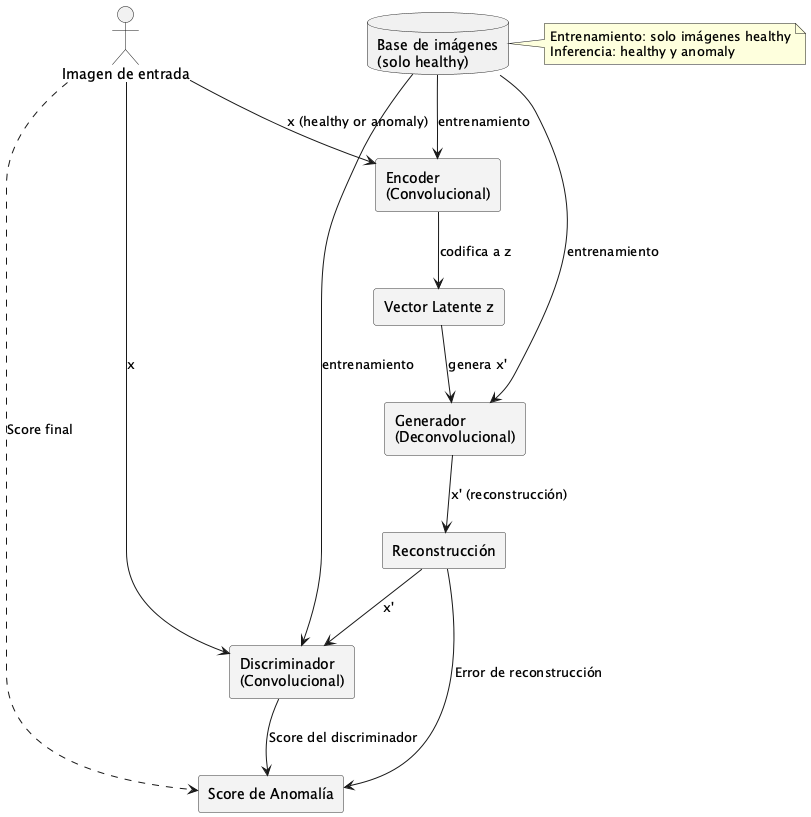

# 5. Modelo GAN

## Encoder

In [109]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),  # 32x32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1),  # 16x16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1),  # 8x8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(256*8*8, latent_dim)
        )

    def forward(self, x):
        return self.model(x)

## Decoder

In [110]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 256*8*8),
            nn.ReLU(True)
        )
        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.fc(z).view(-1, 256, 8, 8)
        return self.deconv(x)

## Descriminator

In [111]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, 4, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),

            nn.Flatten(),
            nn.Linear(256*8*8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instanciar modelos

In [112]:
E = Encoder().to(device)
G = Decoder().to(device)
E2 = Encoder().to(device)
D = Discriminator().to(device)

opt_EG = Adam(list(E.parameters()) + list(G.parameters()) + list(E2.parameters()), lr=lr, betas=(0.5, 0.999))
opt_D = Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

mse_loss = nn.MSELoss()
bce_loss = nn.BCELoss()


In [113]:
print(f"PyTorch version: {torch.__version__}")
print(f"Is CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.5.1+cu121
Is CUDA available: True


## Entrenamiento

#### Dataset Grande

In [114]:
from tqdm import tqdm



loop = tqdm(range(epochs), desc="Entrenando GAN")
for epoch in loop:
    for imgs, _ in train_loader:
        imgs = imgs.to(device)
        valid = torch.ones(imgs.size(0), 1, device=device)
        fake = torch.zeros(imgs.size(0), 1, device=device)

        # ---- Train Discriminator ----
        z = E(imgs)
        recon = G(z)
        D_real = D(imgs)
        D_fake = D(recon.detach())
        loss_D = (bce_loss(D_real, valid) + bce_loss(D_fake, fake)) / 2

        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

         # ---- Train Generator + Encoders ----
        z = E(imgs)
        recon = G(z)
        z_ = E2(recon)

        loss_adv = bce_loss(D(recon), valid)
        loss_con = mse_loss(recon, imgs)
        loss_enc = torch.mean(torch.abs(z - z_))

        loss_G = loss_con + loss_enc + 0.1 * loss_adv

        opt_EG.zero_grad()
        loss_G.backward()
        opt_EG.step()

    loop.set_postfix(D_loss=loss_D.item(), G_loss=loss_G.item())

Entrenando GAN: 100%|██████████| 100/100 [05:45<00:00,  3.46s/it, D_loss=0.249, G_loss=0.559]


##  Evaluación


#### Data Grande desvalanceada

In [115]:
E.eval(); G.eval(); E2.eval()
scores = []
true_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        z = E(imgs)
        recon = G(z)
        z_ = E2(recon)

        score = torch.mean((imgs - recon) ** 2, dim=[1,2,3]) + torch.mean(torch.abs(z - z_), dim=1)
        scores.extend(score.cpu().numpy())
        true_labels.extend(labels.numpy())


healthy_scores = [s for s, l in zip(scores, true_labels) if l == healthy_idx]
threshold = np.percentile(healthy_scores, 95)

preds = [1 if s > threshold else 0 for s in scores]  # 1 = anomaly
bin_labels = [1 if l == anomaly_idx else 0 for l in true_labels]

#### Data Pequeña balanceada

In [116]:
E.eval(); G.eval(); E2.eval()
scores_balanced = []
true_labels_balanced = []

with torch.no_grad():
    for imgs, labels in test_loader_balanced:
        imgs = imgs.to(device)
        z = E(imgs)
        recon = G(z)
        z_ = E2(recon)

        score_balanced = torch.mean((imgs - recon) ** 2, dim=[1,2,3]) + torch.mean(torch.abs(z - z_), dim=1)
        scores_balanced.extend(score_balanced.cpu().numpy())
        true_labels_balanced.extend(labels.numpy())

# Calcular umbral
healthy_scores_balanced = [s for s, l in zip(scores_balanced, true_labels_balanced) if l == healthy_idx]
threshold_balanced = np.percentile(healthy_scores_balanced, 95)

preds_balanced = [1 if s > threshold_balanced else 0 for s in scores_balanced]  # 1 = anomaly
bin_labels_balanced = [1 if l == anomaly_idx else 0 for l in true_labels_balanced]




## Graficos

In [117]:
from sklearn.metrics import roc_curve, auc

In [118]:
print(classification_report(bin_labels, preds, target_names=dataset.classes))

              precision    recall  f1-score   support

     anomaly       0.26      0.95      0.40       319
     healthy       0.98      0.50      0.67      1771

    accuracy                           0.57      2090
   macro avg       0.62      0.73      0.54      2090
weighted avg       0.87      0.57      0.63      2090



In [119]:
print(classification_report(bin_labels_balanced, preds_balanced, target_names=dataset.classes))

              precision    recall  f1-score   support

     anomaly       0.65      0.95      0.77       319
     healthy       0.91      0.49      0.64       319

    accuracy                           0.72       638
   macro avg       0.78      0.72      0.71       638
weighted avg       0.78      0.72      0.71       638



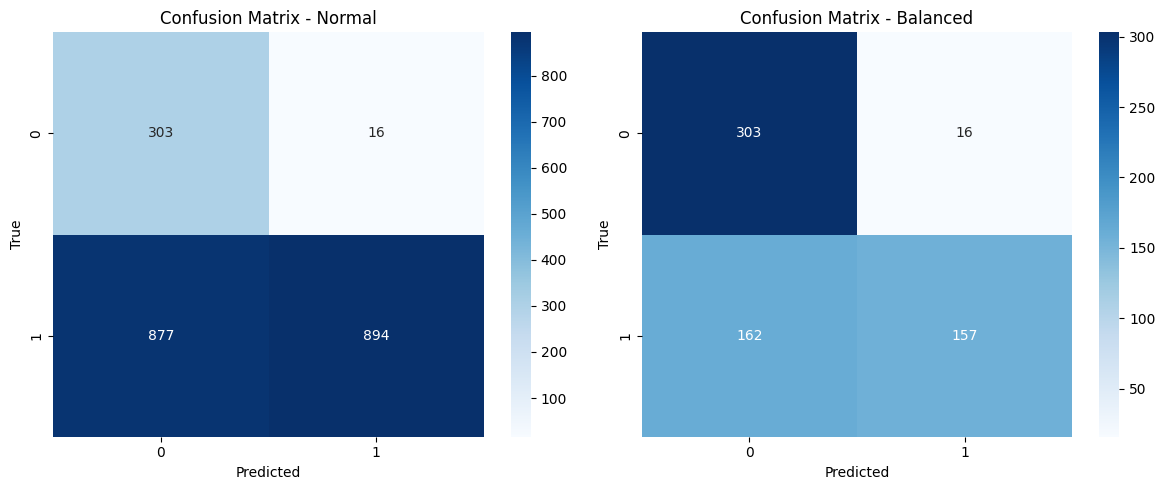

In [120]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Normal (desbalanceado)
cm_normal = confusion_matrix(bin_labels, preds)
sns.heatmap(cm_normal, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix - Normal')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')

# Balanceado
cm_balanced = confusion_matrix(bin_labels_balanced, preds_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Confusion Matrix - Balanced')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')

plt.tight_layout()
plt.show()

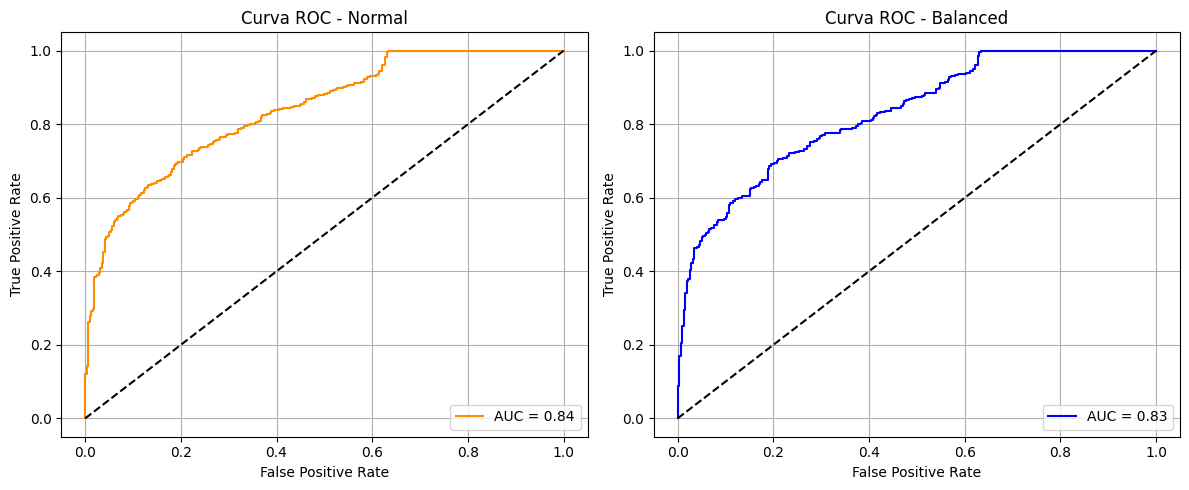

In [121]:
fpr, tpr, _ = roc_curve(bin_labels, scores)
roc_auc = auc(fpr, tpr)


# ROC para el conjunto balanceado
fpr_bal, tpr_bal, _ = roc_curve(bin_labels_balanced, scores_balanced)
roc_auc_bal = auc(fpr_bal, tpr_bal)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ROC Normal
axs[0].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
axs[0].plot([0, 1], [0, 1], 'k--')
axs[0].set_xlabel("False Positive Rate")
axs[0].set_ylabel("True Positive Rate")
axs[0].set_title("Curva ROC - Normal")
axs[0].legend(loc="lower right")
axs[0].grid(True)

# ROC Balanced
axs[1].plot(fpr_bal, tpr_bal, label=f"AUC = {roc_auc_bal:.2f}", color='blue')
axs[1].plot([0, 1], [0, 1], 'k--')
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("Curva ROC - Balanced")
axs[1].legend(loc="lower right")
axs[1].grid(True)

plt.tight_layout()
plt.show()

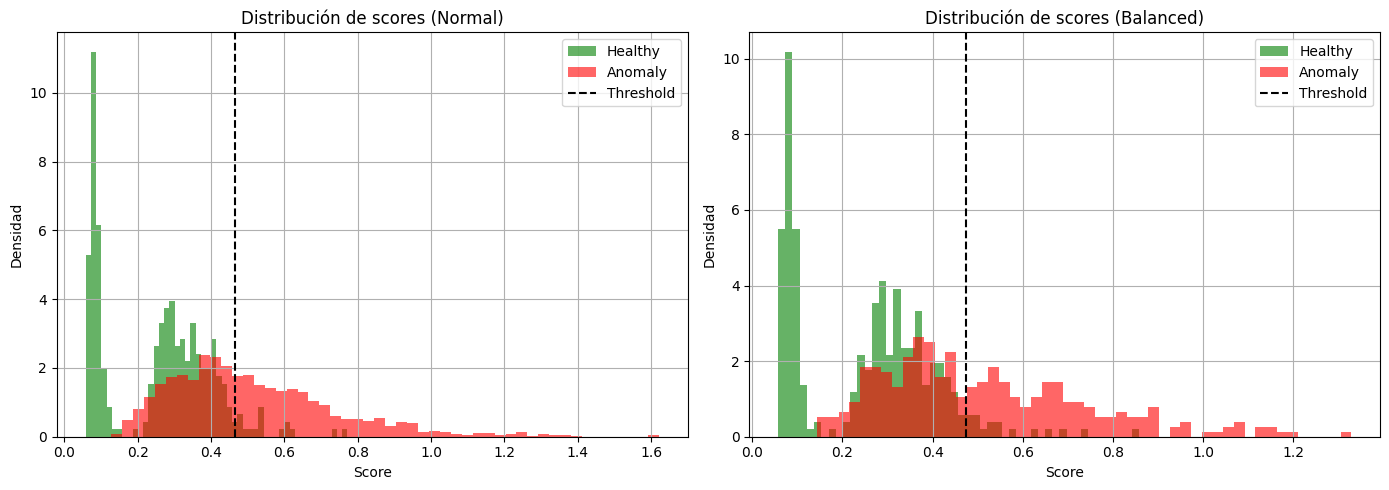

In [122]:
# Separar scores por clase
scores_healthy = [s for s, l in zip(scores, true_labels) if l == healthy_idx]
scores_anomaly = [s for s, l in zip(scores, true_labels) if l == anomaly_idx]



# Subplot de scores para conjunto normal y balanceado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Scores conjunto normal
axs[0].hist(scores_healthy, bins=50, alpha=0.6, label="Healthy", density=True, color="green")
axs[0].hist(scores_anomaly, bins=50, alpha=0.6, label="Anomaly", density=True, color="red")
axs[0].axvline(threshold, color='black', linestyle='--', label='Threshold')
axs[0].set_title("Distribución de scores (Normal)")
axs[0].set_xlabel("Score")
axs[0].set_ylabel("Densidad")
axs[0].legend()
axs[0].grid(True)

# Scores conjunto balanceado
scores_healthy_bal = [s for s, l in zip(scores_balanced, true_labels_balanced) if l == healthy_idx]
scores_anomaly_bal = [s for s, l in zip(scores_balanced, true_labels_balanced) if l == anomaly_idx]

axs[1].hist(scores_healthy_bal, bins=50, alpha=0.6, label="Healthy", density=True, color="green")
axs[1].hist(scores_anomaly_bal, bins=50, alpha=0.6, label="Anomaly", density=True, color="red")
axs[1].axvline(threshold_balanced, color='black', linestyle='--', label='Threshold')
axs[1].set_title("Distribución de scores (Balanced)")
axs[1].set_xlabel("Score")
axs[1].set_ylabel("Densidad")
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()


#### Guardar modelo

In [123]:
torch.save({
    'encoder': E.state_dict(),
    'decoder': G.state_dict(),
    'second_encoder': E2.state_dict(),
    'discriminator': D.state_dict(),
}, 'ganomaly_model.pkl')

print("✅ Modelo guardado como ganomaly_model.pkl")

✅ Modelo guardado como ganomaly_model.pkl


# 9. Acciones